In [51]:
import numpy as np
from matplotlib import pyplot as plt
import sys
import os
from scipy.integrate import quad
from scipy.linalg import block_diag

sys.path.append(os.path.abspath("../utilities"))
from basis import b_spline_basis, polynomial
from matrix_calc import Jcb, calc_basis_matrix

def elements_2(n, p, l1=0, k=3, knots_num=None) -> float:
    if knots_num is None:
        knots = [0.]*k + list(np.linspace(0, 1, k+1)) + [1.]*k
    else:
        knots = [0.]*k + list(np.linspace(0, 1, knots_num - k)) + [1.]*k

    b_spline = lambda t: b_spline_basis(t, k, l1, knots)
    return quad(lambda t: b_spline(t) * polynomial(t, p=p), 0, 1, full_output=True)[0]

def calc_basis_matrix_2(x_basis, b_basis, k=3, knots_num=None) -> np.ndarray:
    return np.array([[elements_2(n=x_basis, p=p, l1=l1, k=k, knots_num=knots_num) for p in range(b_basis)] for l1 in range(x_basis)])

def Jcb_2(*matrices):
    return block_diag(*matrices)

def plot_b_spline_basis(k, knots):
    t_vals = np.linspace(0, 1, 10_000)
    plt.figure(figsize=(10, 6))

    for i in range(knots_num - 1):
        b_spline_vals = [b_spline_basis(t, k, i, knots) for t in t_vals]
        plt.plot(t_vals, b_spline_vals)

    plt.title('B-spline Basis Functions')
    plt.xlabel('$t$')
    plt.ylabel('Basis function value')
    plt.grid(True)
    plt.show()

### Settings

In [127]:
Kx = [[3]]  # B-splines
Kb = [[3]]  # Polynomial
k_degree = 1  # Degree of the B-spline
knots_num = Kx[0][0]  # Number of knots, adjust as needed
knots = [0.]*k_degree + list(np.linspace(0, 1, knots_num - k_degree)) + [1.]*k_degree

### Visualization of b-spline basis

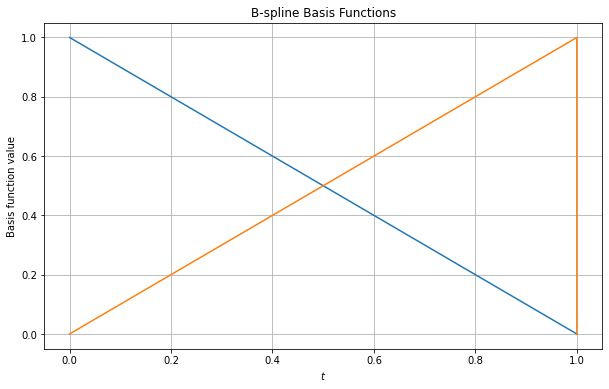

In [128]:
plot_b_spline_basis(k_degree, knots)

### Jcb calculation between b-splines and polynomials

In [129]:
J_cb_2 = np.round(Jcb_2(*[calc_basis_matrix_2(x_basis=x, b_basis=b, k=k_degree, knots_num=knots_num) for x, b in zip([Kx[0][0]-1], Kb[0])]), 3)
print(J_cb_2)

[[0.5   0.167 0.083]
 [0.5   0.333 0.25 ]]


In [130]:
J_cb = np.round(Jcb(*[calc_basis_matrix(x_basis=x, b_basis=b) for x, b in zip([Kx[0][0]-1], Kb[0])]), 3)
print(J_cb)

[[0.5   0.125 0.042]
 [0.5   0.375 0.292]]


In [131]:
print(not bool((np.sum(J_cb_2 == J_cb) / J_cb.size) - 1.))

False
